### Business Problem: Predict whether income of an individual exceeds *$* 50K/per year based on census data.

#### Dataset Used: Census Income data set in the UCI Machine Learning Repository.
    
###### Notebook Created By: Pavani Gangula


In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

### Load the data

In [2]:
# Read the data from UCI Machine learning repository

raw_data = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                      names = ['age','workclass','fnlwgt','education','education-num','marital-status',
                               'occupation','relationship','race','sex','capital-gain',
                               'capital-loss','hours-per-week','native-country',
                              'income'])

# Display the fist 5 rows of the dataset

raw_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Display the last 20 rows of the dataset

raw_data.tail(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


### Analyse the data


In [4]:
# Check the datatypes of all features in the data

raw_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
# Check the descriptive statistics of numerical features in the data

raw_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Check the shape of data

raw_data.shape

(32561, 15)

In [7]:
# Check the total number of null values in the dataset

raw_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Even though we see that there are no missing values being identified, if we observe the dataset, missing values are replaced by the symbol ' ?'
#### We need to treat these missing values and replace them with 'NaN' so that it would be easy to either drop or replace them.

In [8]:
# Check the missing values which have ' ? value in the dataset

raw_data.isin([' ?']).sum(axis = 0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
# Replace all the missing values with 'NaN'

raw_data = raw_data.replace(' ?',np.nan)


In [10]:
# Check the number of missing values 

raw_data_missing = raw_data.isna().sum()
raw_data_missing

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [11]:
# Check the percentage of missing values

raw_data_missing_percent = raw_data_missing/len(raw_data)*100
raw_data_missing_percent

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
income            0.000000
dtype: float64

### Missing Value Treatment
#### As we can see, the columns 'workclass', 'occupation', and 'native-country' have less than 10% missing values, and all three columns are categorical, we impute them with the mode

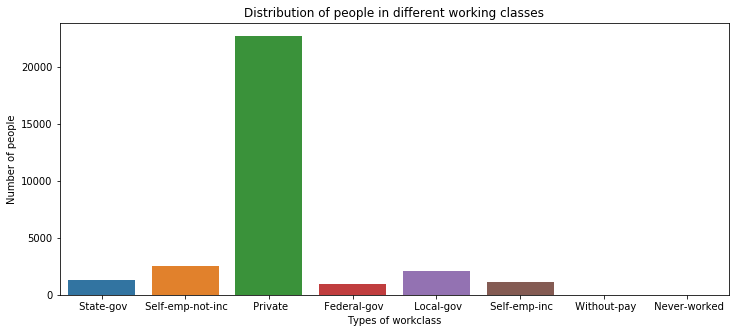

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
# Check the distribution of people according to the work class

plt.figure(figsize = (12,5))
sns.countplot(raw_data['workclass'])
plt.xlabel("Types of workclass")
plt.ylabel("Number of people")
plt.title("Distribution of people in different working classes")
plt.show()

raw_data['workclass'].value_counts()

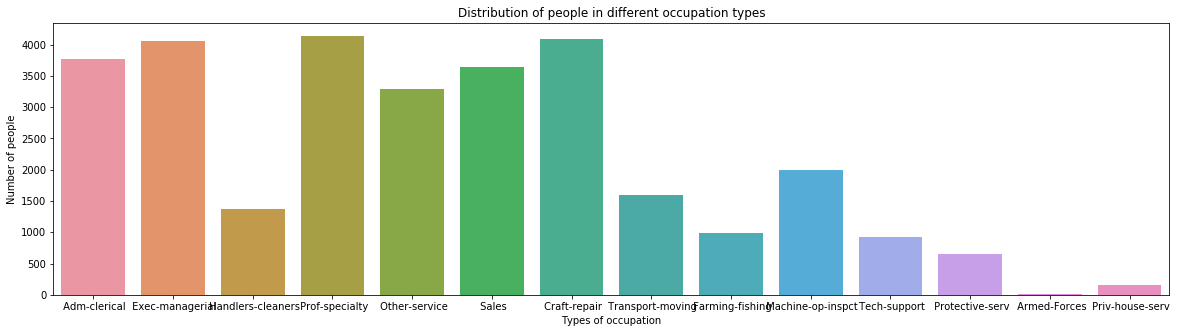

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
# Check the distribution of people according to occupation type

plt.figure(figsize = (20,5))
sns.countplot(raw_data['occupation'])
plt.xlabel("Types of occupation")
plt.ylabel("Number of people")
plt.title("Distribution of people in different occupation types")
plt.show()

raw_data['occupation'].value_counts()

In [14]:
# Check the distribution of people according to country

raw_data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

#### We observe that for column 'workclass', most people belong to 'Private', for column 'occupation', most people belong to 'Prof-specialty', and for column 'native-country', most people belong to 'United-States'. So, we will impute the missing values in these columns with the mode value.

In [15]:
# Imputing the missing values with mode

raw_data['workclass']  = raw_data['workclass'].fillna(raw_data['workclass'].mode()[0])
raw_data['occupation']  = raw_data['occupation'].fillna(raw_data['occupation'].mode()[0])
raw_data['native-country']  = raw_data['native-country'].fillna(raw_data['native-country'].mode()[0])

In [16]:
# Check the missing values in the data

raw_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [17]:
# Check descriptive statistics of categorical features

raw_data.describe(include = ["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB058F3E10>,
      dtype=object)

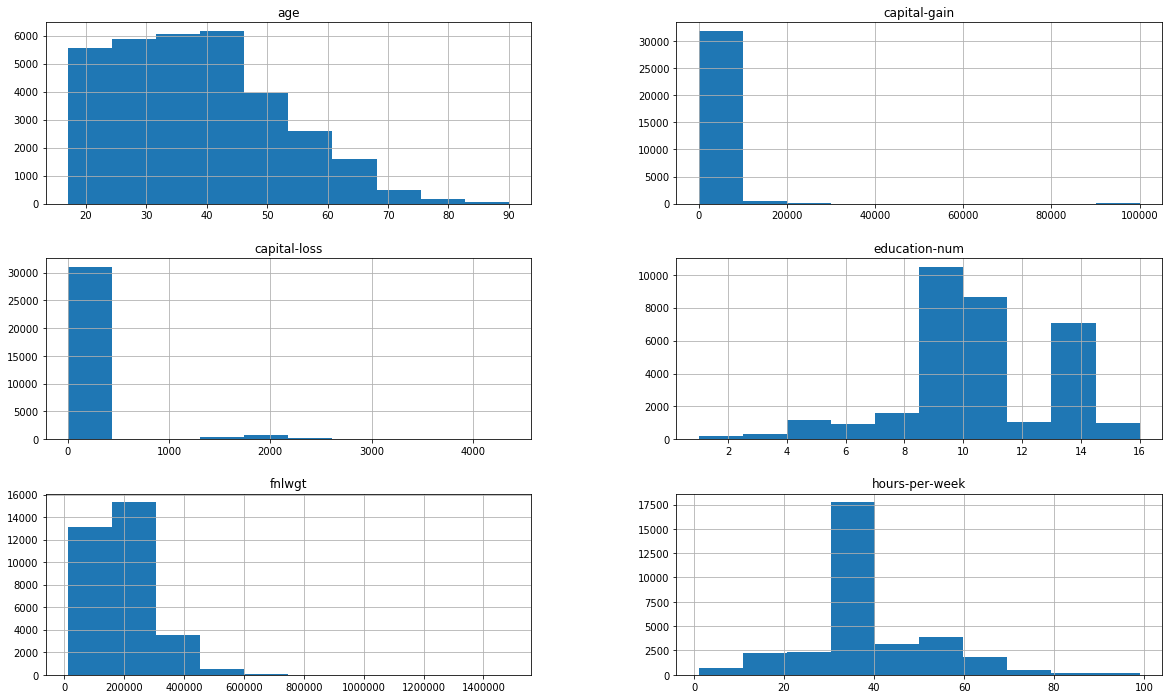

In [18]:
# Check the data distribution of numerical features using histograms

rcParams['figure.figsize'] = 20,12
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
raw_data[num_cols].hist()

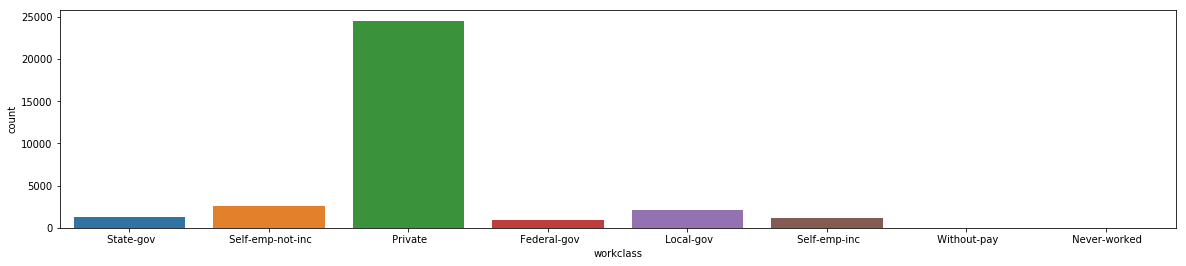

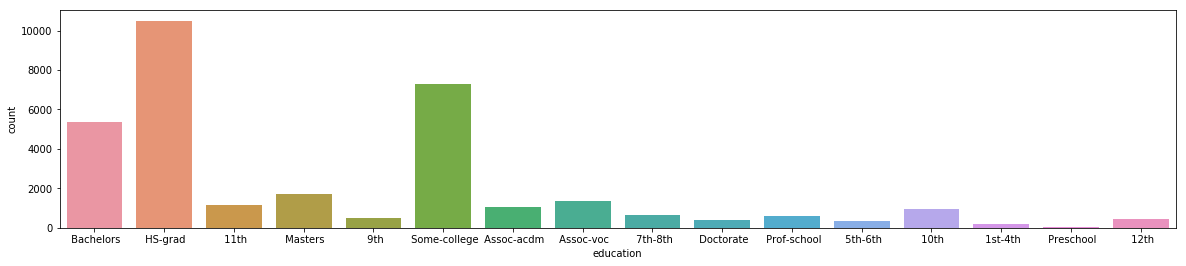

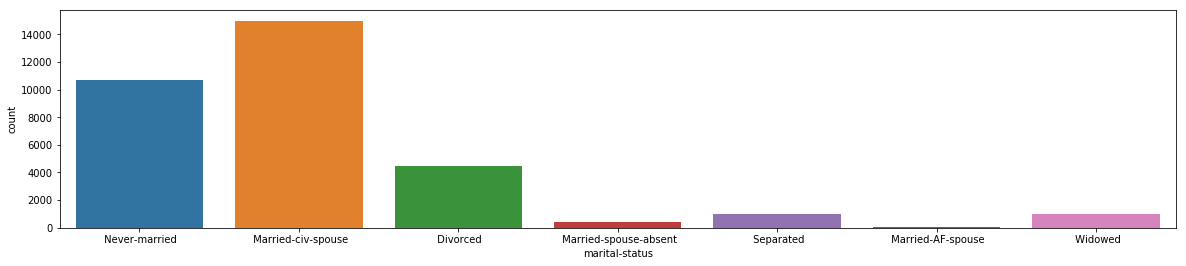

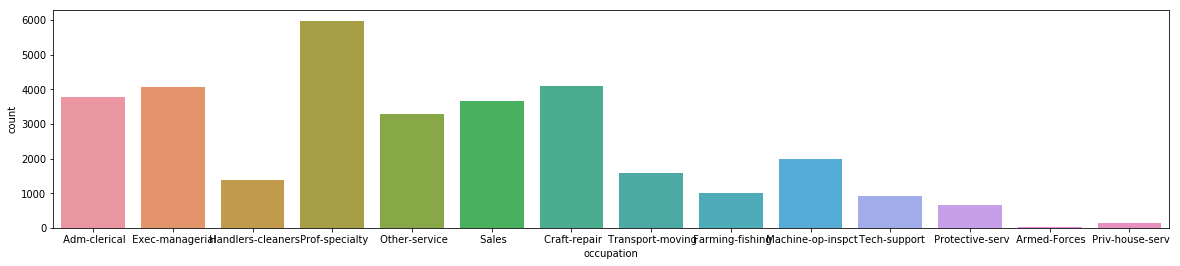

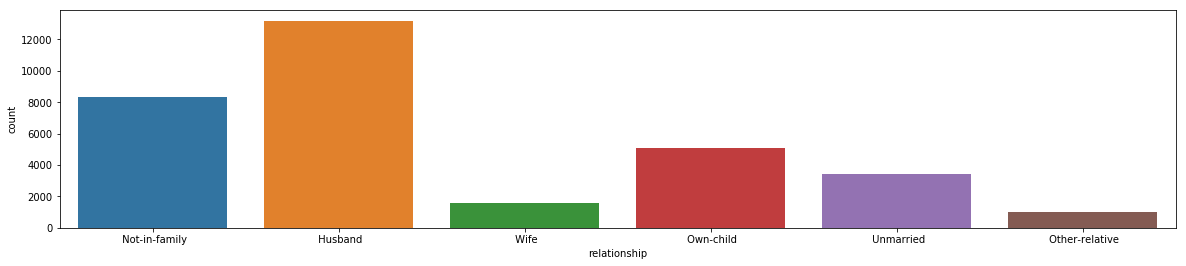

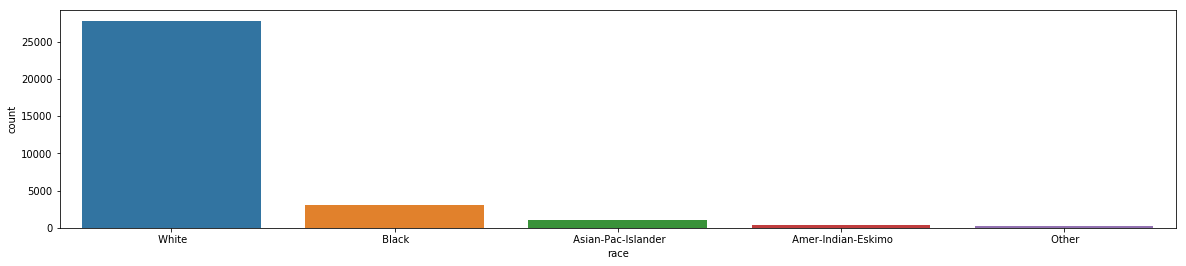

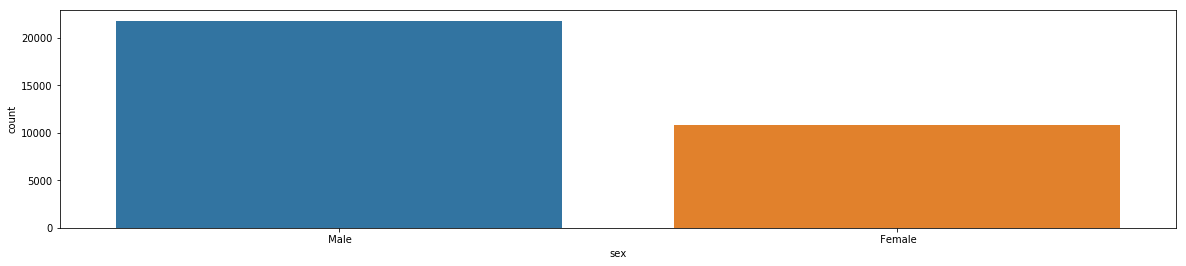

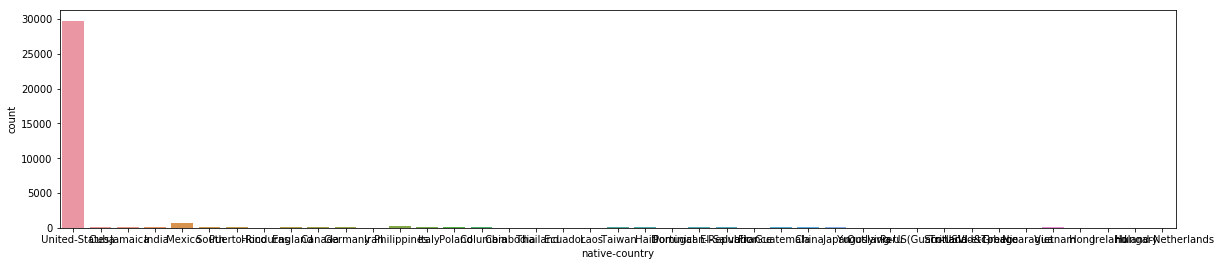

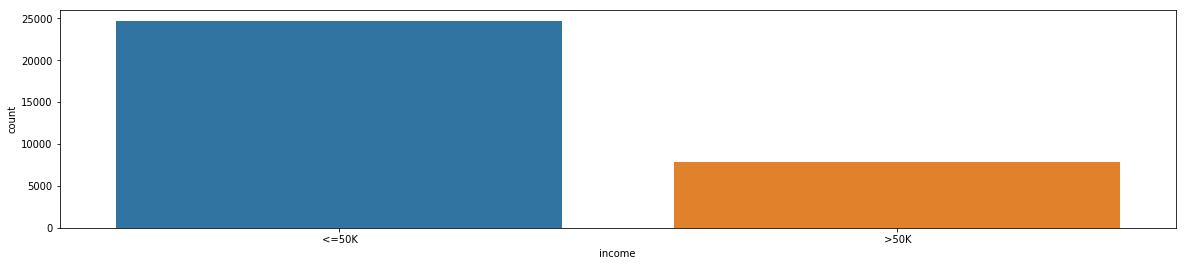

In [19]:
# Check the data distribution of categorical features using barplots

cat_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']

for col in cat_cols:
    plt.figure(figsize = (20,4))
    sns.countplot(x=col, data = raw_data)
    plt.show()

### Bivariate Analysis

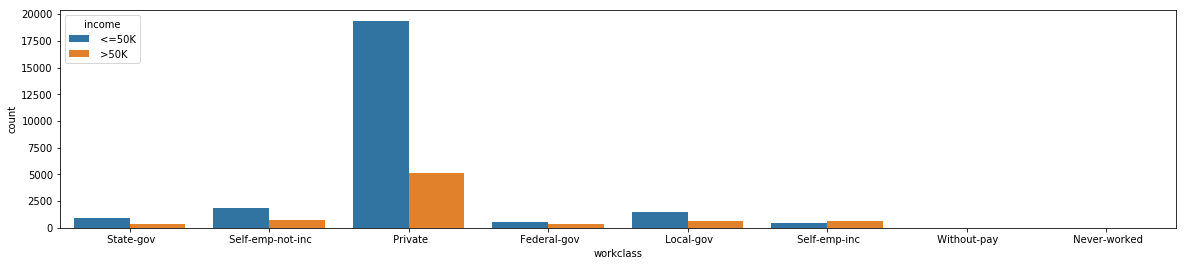

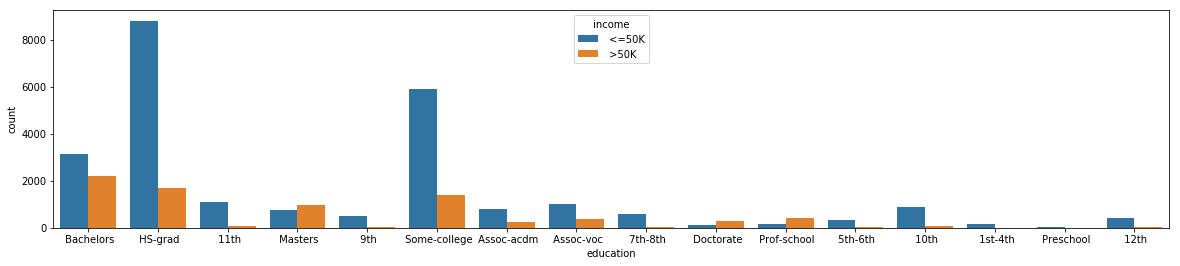

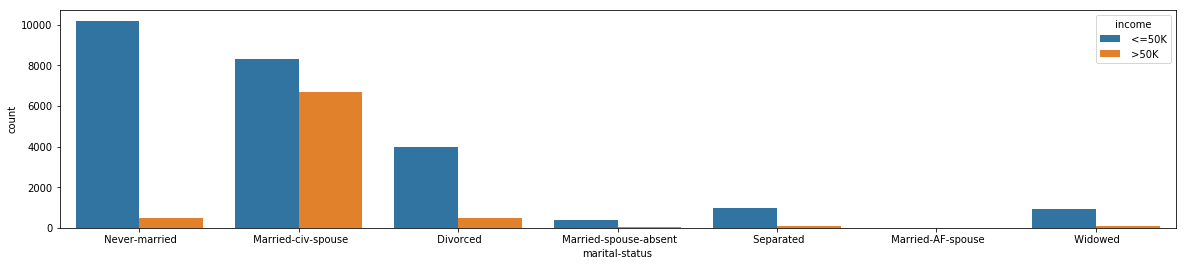

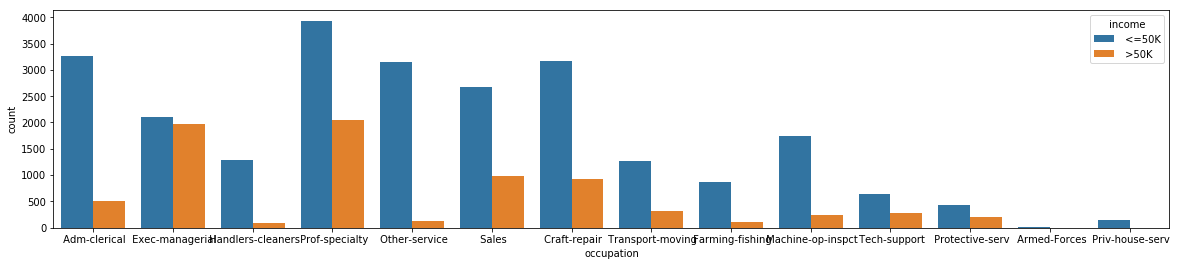

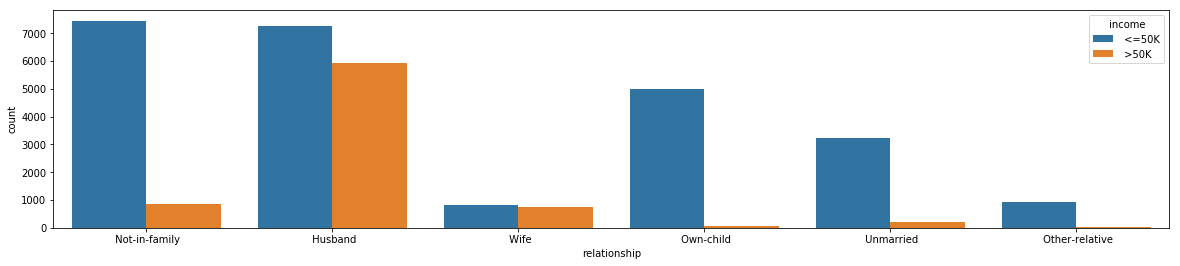

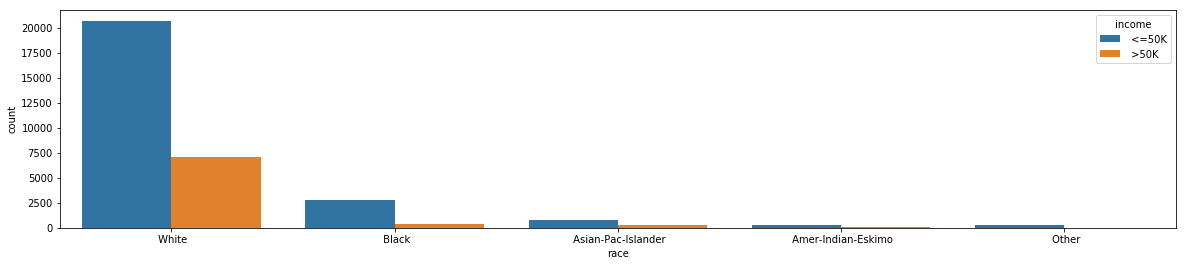

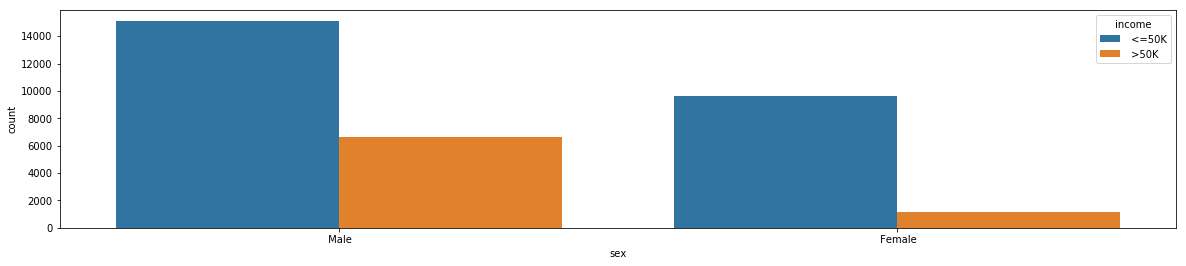

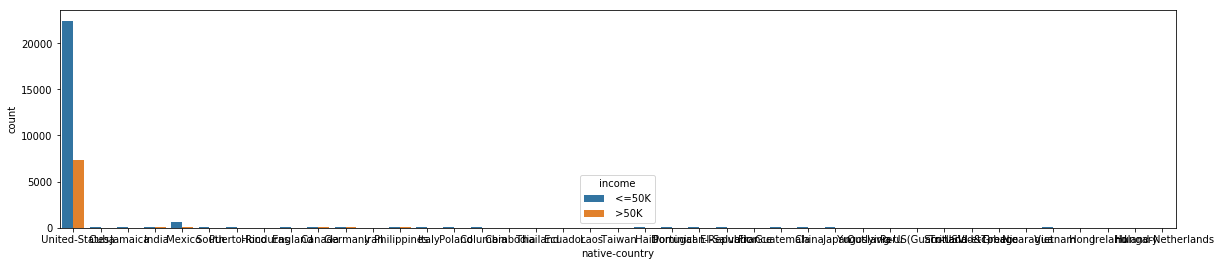

In [20]:
# Check the data distribution of categorical features with respect to income using barplots

cat_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

for col in cat_cols:
    plt.figure(figsize = (20,4))
    sns.countplot(x=col, hue = 'income', data = raw_data)
    plt.show()


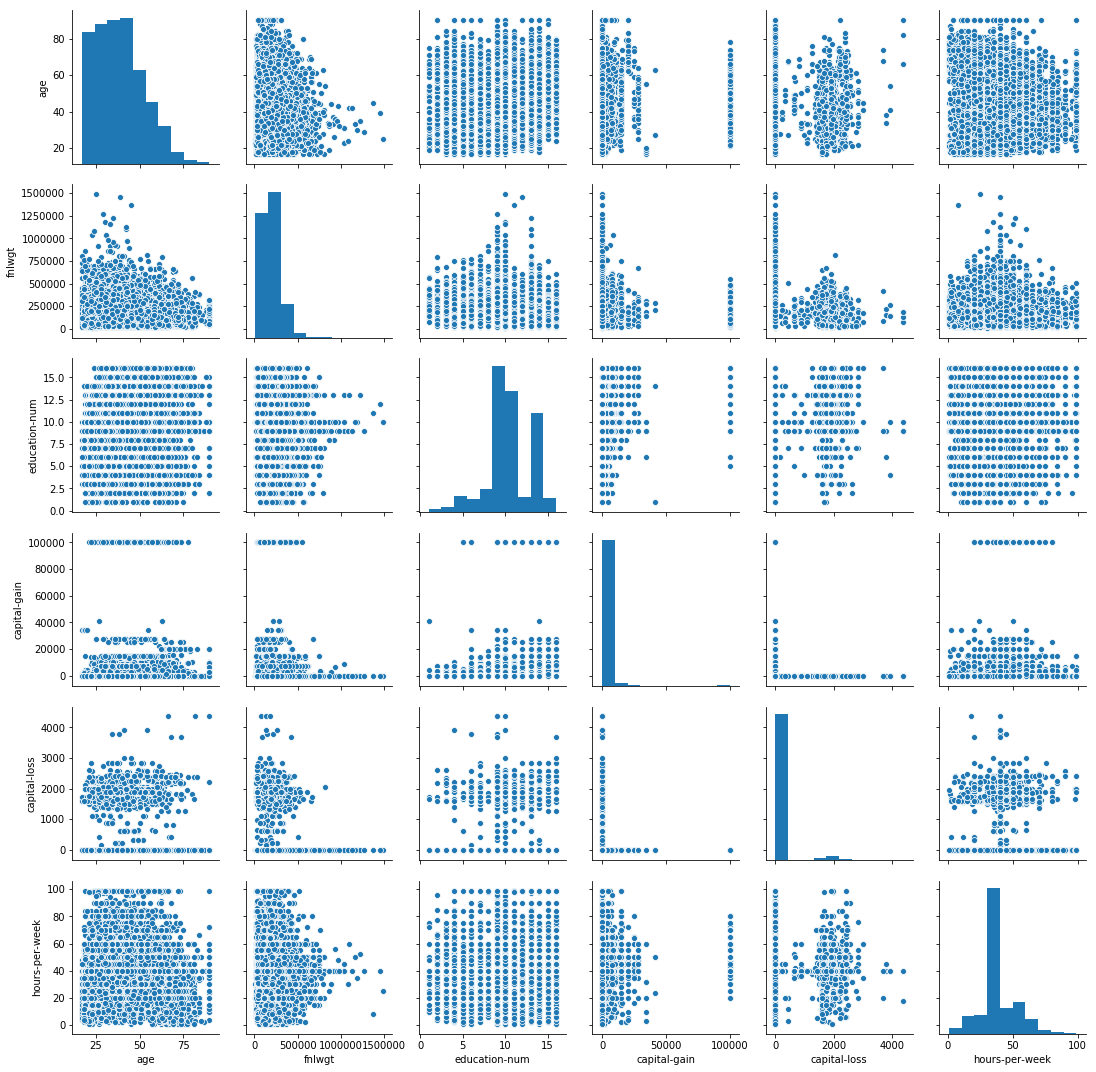

In [21]:
# Check the relationship between numerical features in the data

sns.pairplot(raw_data)

### From the above pair plot, we can see that there is no high positive or negative correlation between the features

### Multivariate Analysis

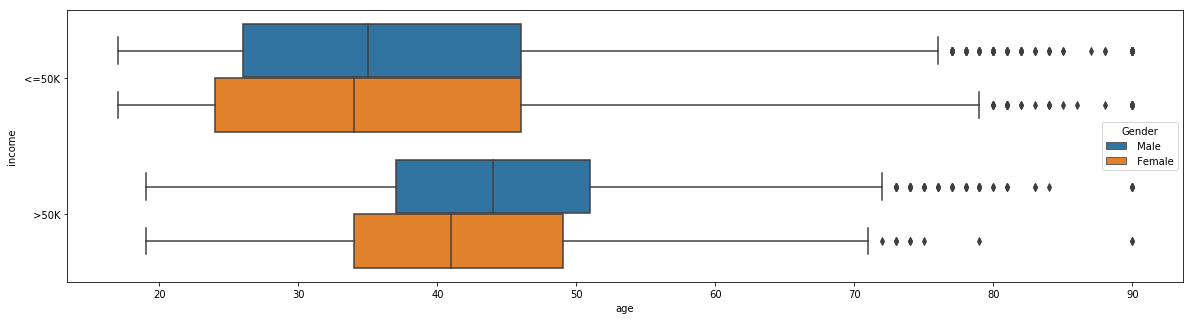

In [22]:
# Check distribution of age and income with respect to gender

plt.figure(figsize = (20,5))
sns.boxplot(x="age", y="income", hue = 'sex',data=raw_data)
plt.legend(loc='center right', title='Gender')

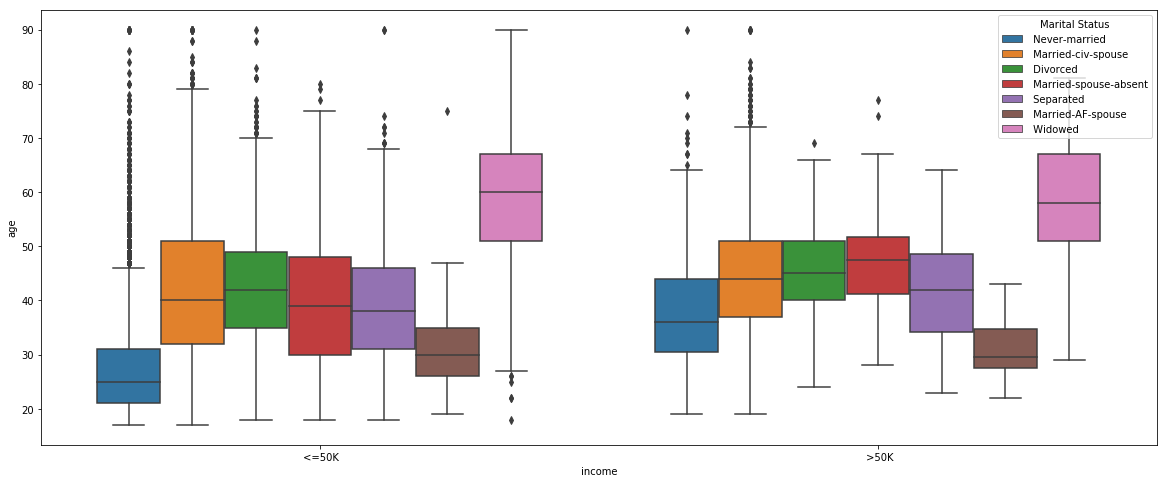

In [23]:
# Check distribution of age and gender with respect to marital status

plt.figure(figsize = (20,8))
sns.boxplot(x="income", y="age", hue = 'marital-status',data=raw_data)
plt.legend(loc='upper right', title='Marital Status')

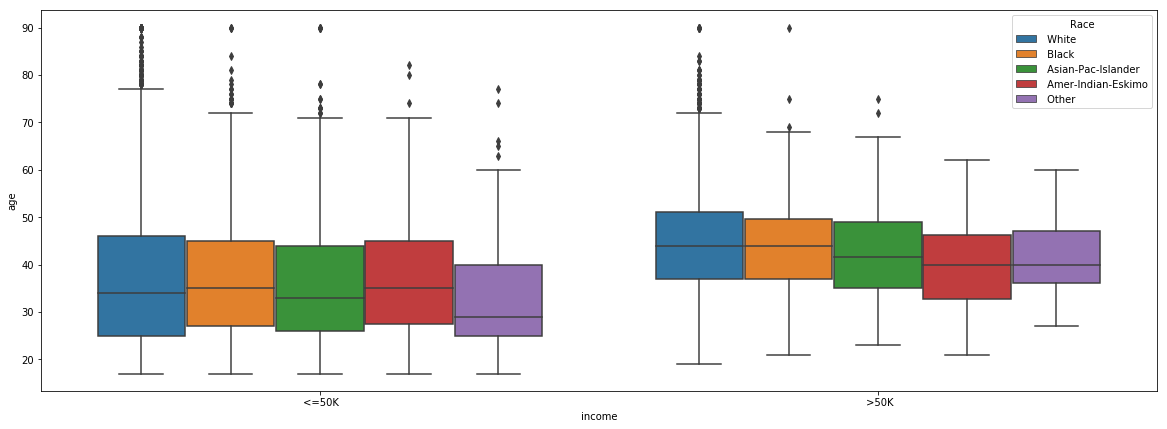

In [24]:
# Check distribution of age and income with respect to race

plt.figure(figsize = (20,7))
sns.boxplot(x="income", y="age", hue = 'race',data=raw_data)
plt.legend(loc='upper right', title='Race')

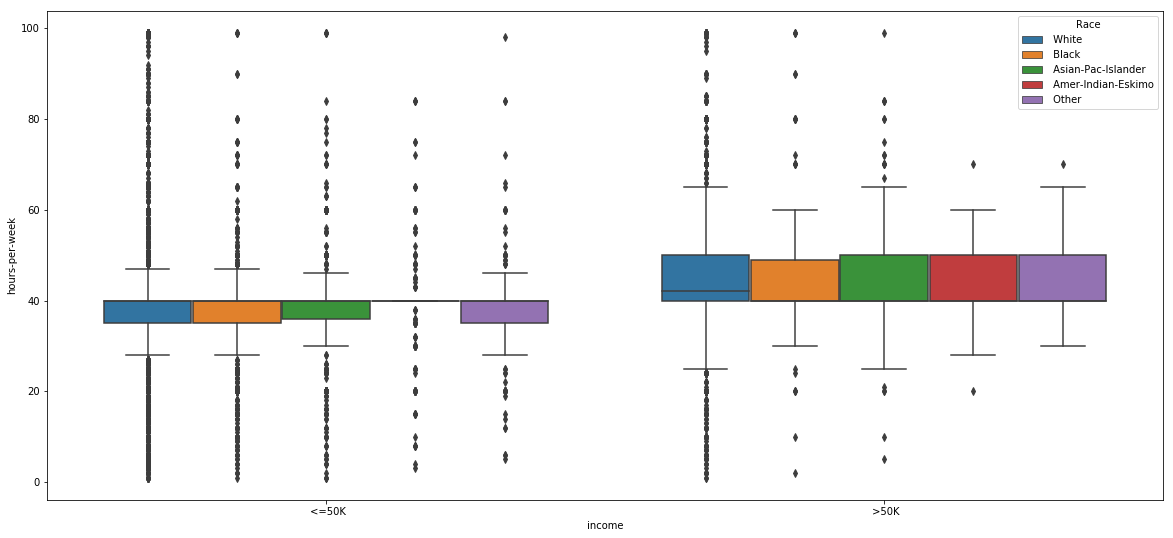

In [25]:
# Check distribution of hours-per-week and income with respect to race

plt.figure(figsize = (20,9))
sns.boxplot(x="income", y="hours-per-week", hue = 'race',data=raw_data)
plt.legend(loc='upper right', title='Race')

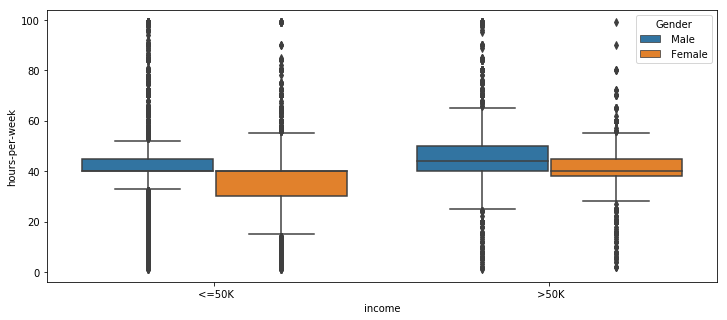

In [26]:
# Check distribution of hours-per-week and income with respect to race

plt.figure(figsize = (12,5))
sns.boxplot(x="income", y="hours-per-week", hue = 'sex',data=raw_data)
plt.legend(loc='upper right', title='Gender')

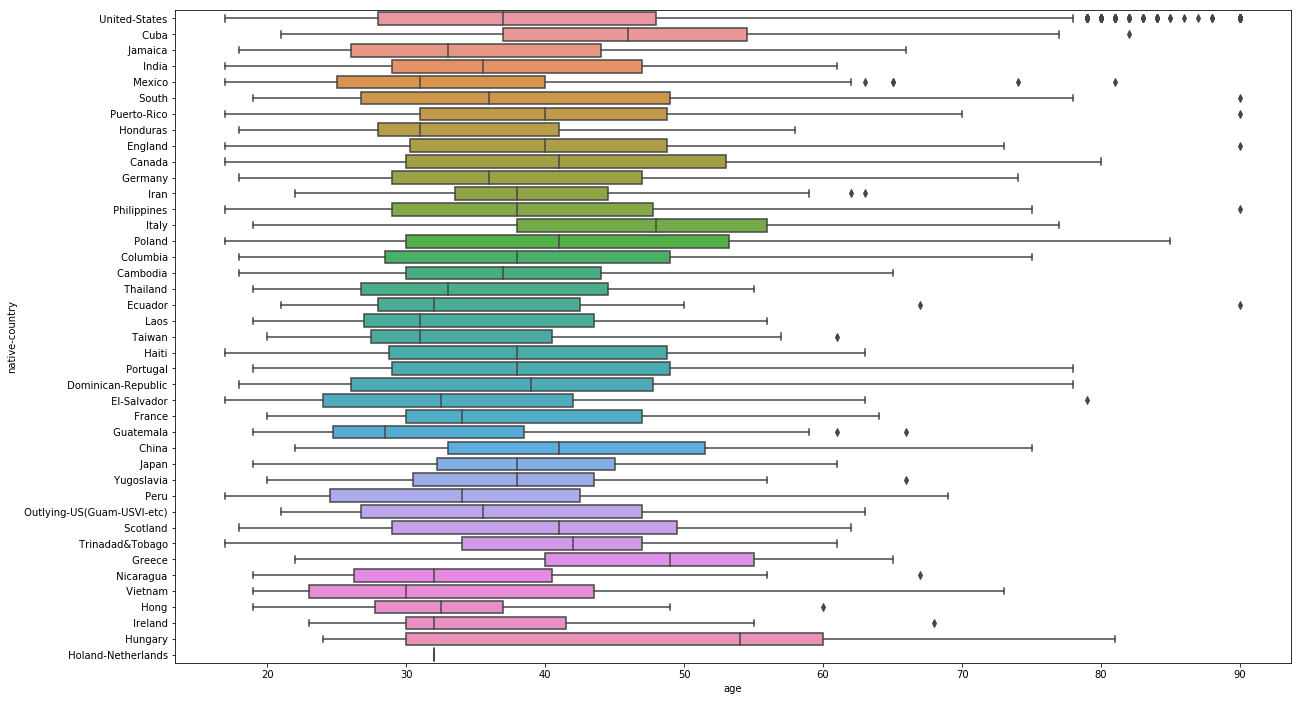

In [27]:
# Check distribution of hours-per-week and income with respect to race

plt.figure(figsize = (20,12))
sns.boxplot(x="age", y="native-country",data=raw_data)


### Feature Engineering

In [28]:
# Endcoding all categorical columns using a Label Encoder

clean_data = raw_data.copy(deep = True)

le = LabelEncoder()

for col in clean_data.columns:
    clean_data[col] = le.fit_transform(clean_data[col])


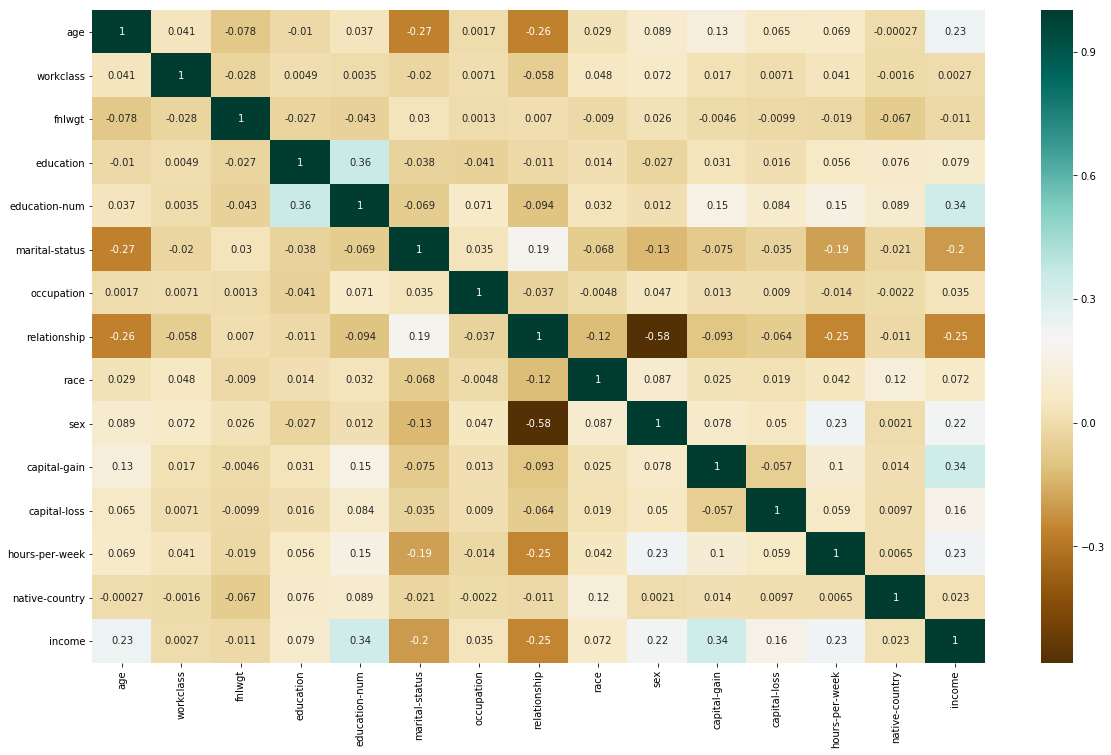

In [29]:
# Check the correlation of features using a heat map

sns.heatmap(clean_data.corr(), annot = True, cmap = 'BrBG')

### Model Building

In [30]:
# Preparing the data for model building

X = clean_data.drop(['income'], axis =1)
Y = clean_data['income']

In [31]:
# Split the training the validation data in 70,30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [32]:
# Check the feature importance scores using Random Forest Algorithm

random_forest = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs = -1)
random_forest.fit(X_train, Y_train)

for feature in zip(X.columns, random_forest.feature_importances_):
    print(feature)

('age', 0.1513581608492226)
('workclass', 0.03924657040863542)
('fnlwgt', 0.16881870211572936)
('education', 0.03496306552491685)
('education-num', 0.08826975720036936)
('marital-status', 0.0688861645082533)
('occupation', 0.06759904367836382)
('relationship', 0.10313262882039488)
('race', 0.014527925061060027)
('sex', 0.013278706270639505)
('capital-gain', 0.11380317926640908)
('capital-loss', 0.03519688586416241)
('hours-per-week', 0.08637949916536383)
('native-country', 0.014539711266479717)


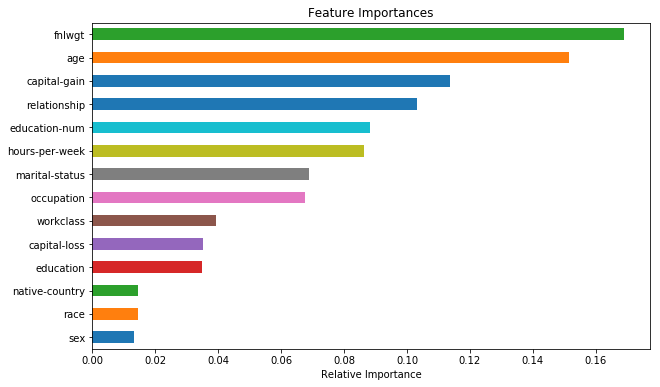

In [33]:
# Plot the feature importance scores

plt.figure(figsize = (10,6))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

feat_importances = pd.Series(random_forest.feature_importances_, index = X.columns)
feat_importances.sort_values().plot(kind = 'barh')
plt.show()



In [34]:
# From the above graph, we can infer that the variables 'sex', 'race' and 'native-country' are having least significance.
# Hence we remove those features from the dataset

X_imp = X[['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 
       'capital-gain', 'capital-loss', 'hours-per-week']]

In [35]:
# Split the training and validation dataset in 70,30 ratio

X_train , X_test, Y_train, Y_test = train_test_split(X_imp, Y, test_size = 0.3, random_state = 0)

In [36]:
# Check the class distribution of the target variable

clean_data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

### The data is imbalanced if we look at the class distribution. For imbalanced data, there is a chance that the majority class will try to influence our model predictions. Hence we need to balance the data. There are two major types of sampling techniques used for balancing the data. In this example, we can use SMOTE (Synthetic Minority Oversampling Technique). In this technique, new example records of the minority class will be synthesized.

In [37]:
# Using SMOTE, we increase the minority class distribution and then feed it to the model

from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(Y_train)
print('Before Sampling ',counter)

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, Y_train)

counter = Counter(y_train_sm)
print('After Sampling ',counter)

Before Sampling  Counter({0: 17313, 1: 5479})
After Sampling  Counter({1: 17313, 0: 17313})


In [38]:
#  Standardize features by removing the mean and scaling to unit variance using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_sm), columns = X_imp.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_imp.columns)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size = 0.3, random_state = 0)

[19:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy Score is: 89.81517135155948 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5142
           1       0.90      0.90      0.90      5246

    accuracy                           0.90     10388
   macro avg       0.90      0.90      0.90     10388
weighted avg       0.90      0.90      0.90     10388



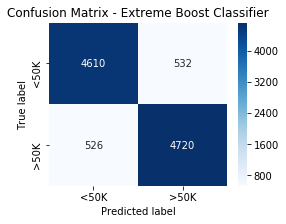

In [40]:
# Extreme Boost Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('\n')
print('Accuracy Score is:',accuracy_score(y_test, y_pred)*100,'\n')

plt.figure(figsize = (4,3))
conf_matrix = confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', 
           xticklabels = ['<50K','>50K'],
           yticklabels = ['<50K','>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Extreme Boost Classifier')

print(classification_report(y_test, y_pred))

Accuracy Score is: 85.07893723527147 

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5142
           1       0.84      0.86      0.85      5246

    accuracy                           0.85     10388
   macro avg       0.85      0.85      0.85     10388
weighted avg       0.85      0.85      0.85     10388



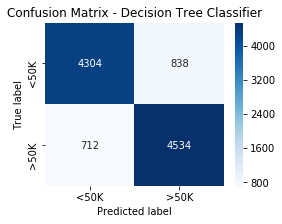

In [41]:
# Decision Tree

Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
y_pred = Dt.predict(X_test)

print('Accuracy Score is:',accuracy_score(y_test, y_pred)*100,'\n')

plt.figure(figsize = (4,3))
conf_matrix = confusion_matrix(y_test, Dt.predict(X_test))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', 
           xticklabels = ['<50K','>50K'],
           yticklabels = ['<50K','>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Decision Tree Classifier')

print(classification_report(y_test, y_pred))

Accuracy Score is: 87.5240662302657 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5142
           1       0.87      0.89      0.88      5246

    accuracy                           0.88     10388
   macro avg       0.88      0.88      0.88     10388
weighted avg       0.88      0.88      0.88     10388



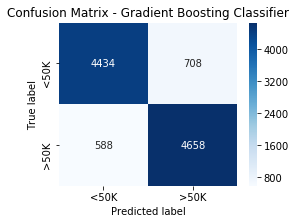

In [42]:
# Gradient Boosting Classifier

Gb = GradientBoostingClassifier()
Gb.fit(X_train, y_train)
y_pred = Gb.predict(X_test)

print('Accuracy Score is:',accuracy_score(y_test, y_pred)*100,'\n')

plt.figure(figsize = (4,3))
conf_matrix = confusion_matrix(y_test, Gb.predict(X_test))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', 
           xticklabels = ['<50K','>50K'],
           yticklabels = ['<50K','>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')

print(classification_report(y_test, y_pred))

## From the above three models, we can infer that Extreme Boost Classifier has got good precision and recall scores along with an accuracy of ~90%


## Hence we can say that the 'Extreme Boost Classifier' or 'XGBoost' is the 'Champion Model'